# Correlation Baselines

In [22]:
import os
import sys
sys.path.append("..")
BaselineSet = sorted(os.listdir('../Baselines/'))
print("Baseline Set: ", BaselineSet)

Baseline Set:  ['00-KendallCorrelations', '00-PearsonCorrelations', '00-SpearmanCorrelations', '18-NOTEARS', '18-NRI', '19-DAGGNN', '96-reverse-beta1e-2', '97-reverse-beta1e-1', '98-reverse-beta1e-1', '99-reverse']


In [25]:
# 计算平均矩阵，无需重复运行
import numpy as np
from Modules.LoadData.load_data_ADNI import get_labels
for i in range(1):
    TargetBaseline = BaselineSet[i+6]
    print("Target Baseline: ", TargetBaseline)
    TargetDir = "../Baselines/" + TargetBaseline + "/ECNs_results/"
    df = get_labels(parent=2)
    # average = np.zeros([90,90])
    average = np.zeros([90,90,187])
    num = 0
    for row in df.itertuples():
        path = TargetDir + row.id + "_" + row.group + ".npy"
        a = np.load(path)
        average += a
        num += 1
    average_all = average/num
    average_all = np.average(average_all,axis=2)

    np.save(TargetDir+"average_all.npy", average_all)

Target Baseline:  96-reverse-beta1e-2


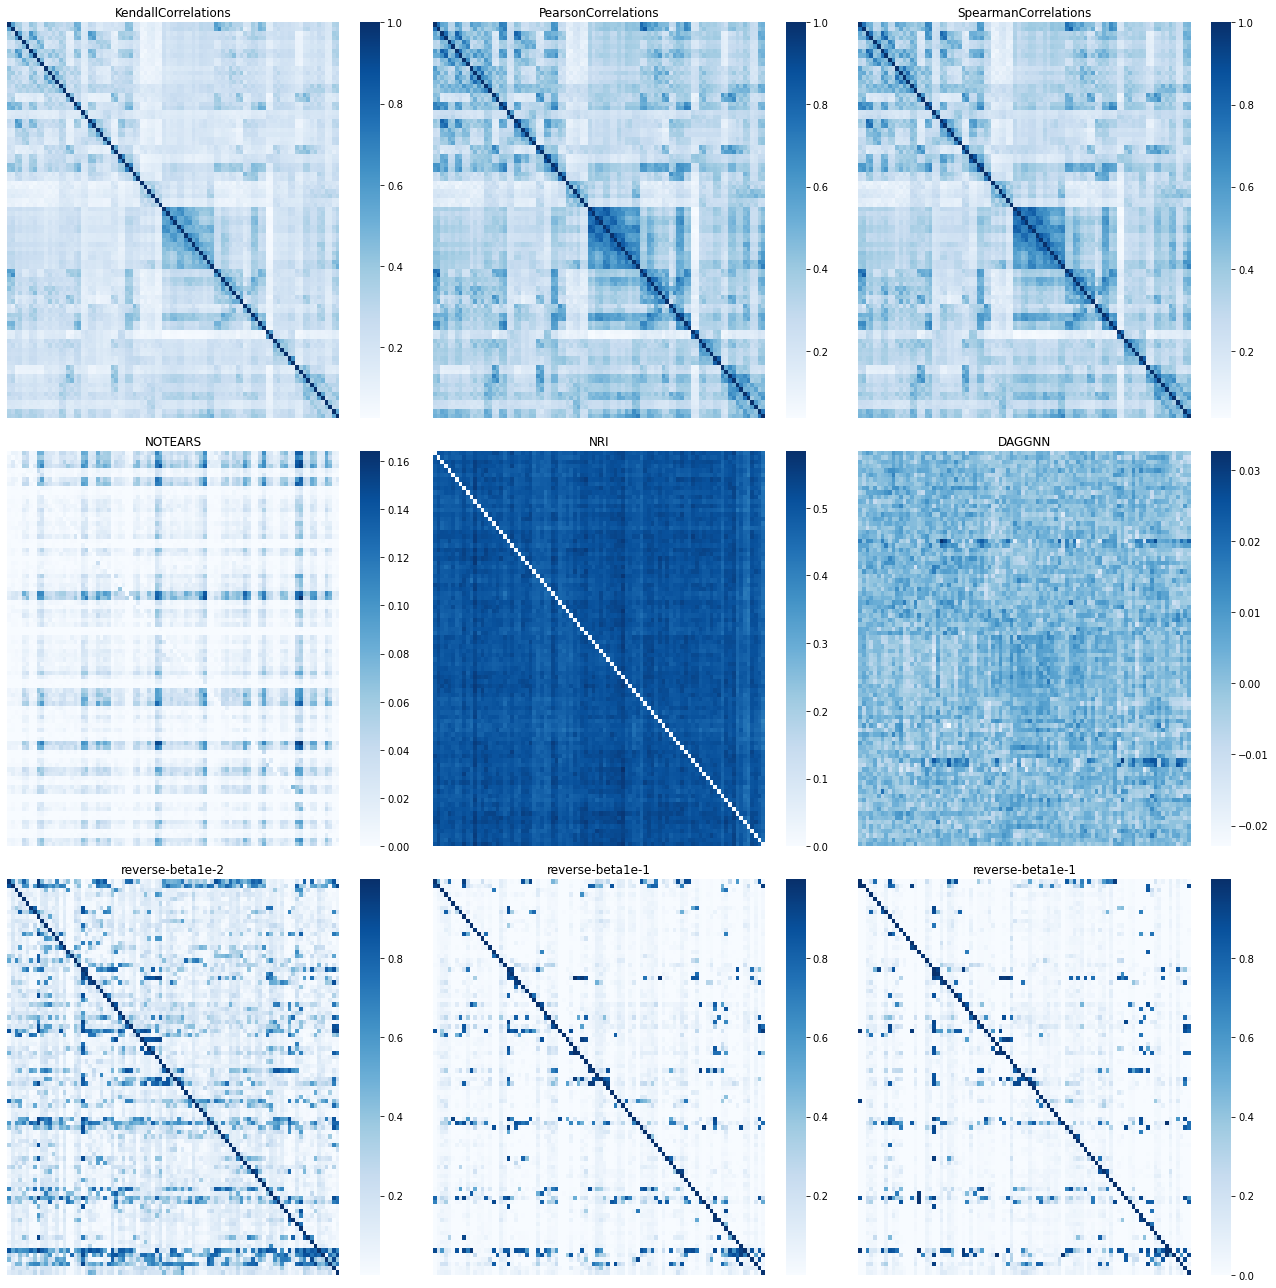

In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 创建一个包含6个子图的图形
fig, axes = plt.subplots(3, 3, figsize=(18, 18))

# 绘制每个矩阵的热力图
for i, ax in enumerate(axes.flat):
    TargetBaseline = BaselineSet[i]
    TargetDir = "../Baselines/" + TargetBaseline + "/ECNs_results/"
    matrix = np.load(TargetDir+"average_all.npy")
    sns.heatmap(data=matrix, cmap='Blues', xticklabels=False, yticklabels=False, ax=ax)
    ax.set_title(BaselineSet[i][3:])
# 调整子图间距
plt.tight_layout()
# 显示图形
plt.show()

['00-KendallCorrelations', '00-PearsonCorrelations', '00-SpearmanCorrelations', '18-NOTEARS', '18-NRI', '19-DAGGNN', '97-reverse', '98-reverse']


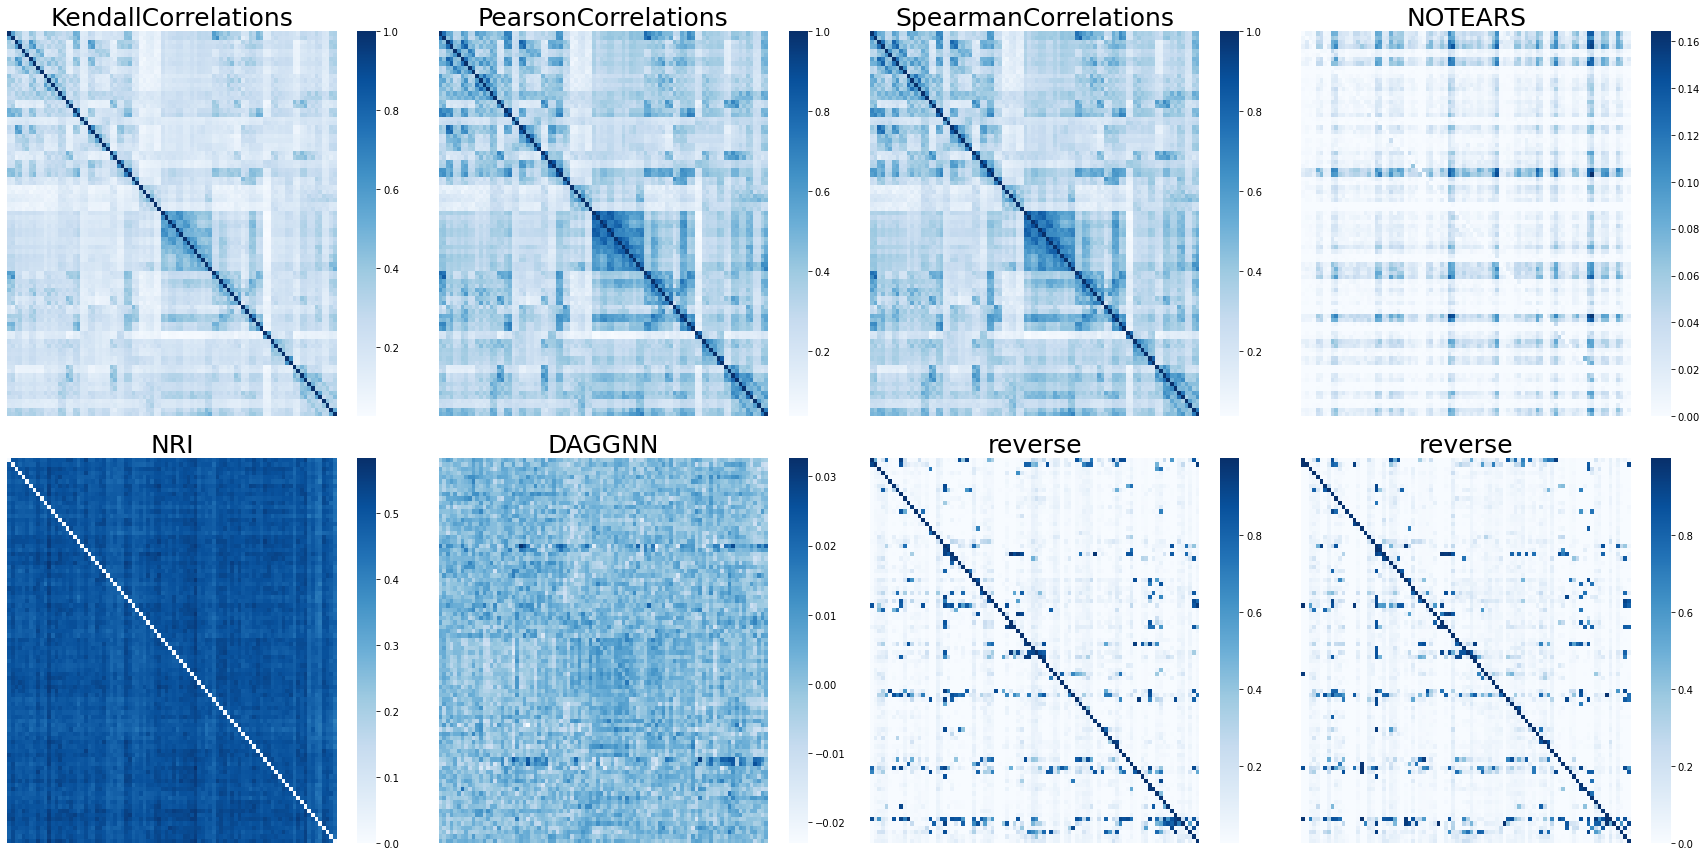

In [21]:
# Select & Save
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
indices = [0,1,2,3,4,5,6,7]
SelectedBaselineSet = [BaselineSet[i] for i in indices]
print(SelectedBaselineSet)
# 创建一个包含6个子图的图形
fig, axes = plt.subplots(2,4, figsize=(24, 12))

# 绘制每个矩阵的热力图
for i, ax in enumerate(axes.flat):
    TargetBaseline = SelectedBaselineSet[i]
    TargetDir = "../Baselines/" + TargetBaseline + "/ECNs_results/"
    matrix = np.load(TargetDir+"average_all.npy")
    sns.heatmap(data=matrix, cmap='Blues', xticklabels=False, yticklabels=False, ax=ax)
    ax.set_title(SelectedBaselineSet[i][3:], fontsize=25)
# 调整子图间距
plt.tight_layout()
plt.savefig('GlobalAverage.pdf')
# 显示图形
plt.show()